In [1]:
import waveprop as wv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Courant number = 0.5


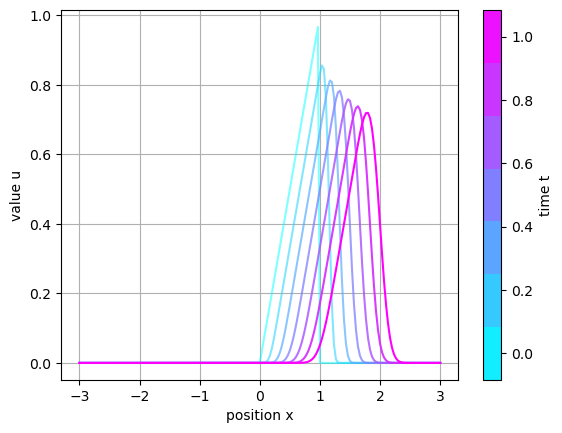

In [ ]:
c = 1
M = 181
N = 61

solver = wv.Solver(c,N,M,t_F=1)

u = solver.simulatelinear(wv.BasicUpwind,wv.wave_g)
x = solver.get_x()
t = solver.get_t()
T = []

alphas = np.linspace(0.5,1,N)
colors = mpl.colormaps["cool"](np.linspace(0,1,N))

fig,ax = plt.subplots(1,1)
for i in range(N):
    if i % 10 == 0:
        ax.plot(x,u[i],color=colors[i],alpha=alphas[i])
        T.append(t[i])
ax.grid()
ax.set_xlabel("position x")
ax.set_ylabel("value u")
#ax.set_title(f"Courant number = {round(solver.C,3)}, M={M}, N={N}")

print(f"Courant number = {round(solver.C,3)}")
sm = mpl.cm.ScalarMappable(cmap="cool")
fig.colorbar(sm,ax=ax,label="time t",values=T)

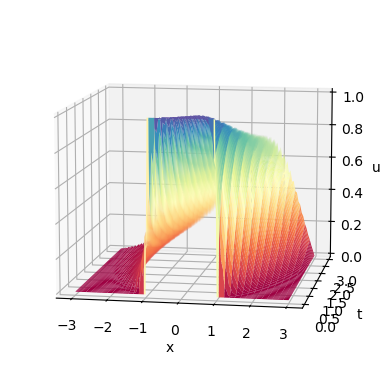

In [49]:
ax = plt.figure().add_subplot(projection="3d")
X,T = np.meshgrid(solver.get_x(),solver.get_t())
ax.plot_surface(X,T,u,alpha=1,cmap=mpl.cm.Spectral)
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
ax.view_init(10,280,0)

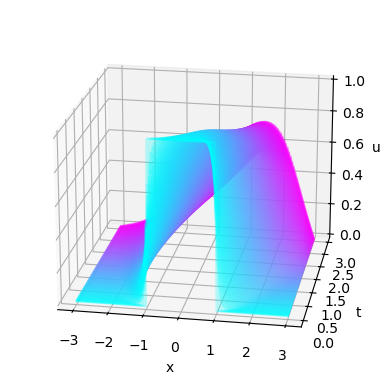

In [50]:
ax = plt.figure().add_subplot(projection="3d")
X,T = np.meshgrid(solver.get_x(),solver.get_t())
for i in range(N):
    ax.plot(X[N-1-i],T[N-1-i],u[N-1-i],alpha=1-0.13*np.log(N),color=colors[N-1-i])
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
ax.view_init(20,280,0)